In [133]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Data Extraction

The dataset resource from ANALYZE BOSTON offical website, download link is:
https://data.boston.gov/dataset/economic-indicators-legacy-portal/resource/29e74884-a777-4242-9fcc-c30aaaf3fb10


This dataset is have the topics such as the employment, housing, travel, and real estate development. This is a legacy dataset of economic idicators tracked monthly between January2013 and January 2015.

In this capston project, I will mainly analysis:

    Tourism(2 column): include passenger traffic at logan and international flights at logan
    Hotel Market(2 column): include occupancy rate and average dailty rate
    Laber market(3 column): include Total jobs, unemployement rate, and labor force participation rate.


Code to download the dataset

In [225]:
df = pd.read_csv('https://data.boston.gov/dataset/c8b8ef8c-dd31-4e4e-bf19-af7e4e0d7f36/resource/29e74884-a777-4242-9fcc-c30aaaf3fb10/download/economic-indicators.csv')
df.head()

,Year,Month,logan_passengers,logan_intl_flights,hotel_occup_rate,hotel_avg_daily_rate,total_jobs,unemp_rate,labor_force_part_rate,pipeline_unit,pipeline_total_dev_cost,pipeline_sqft,pipeline_const_jobs,foreclosure_pet,foreclosure_deeds,med_housing_price,housing_sales_vol,new_housing_const_permits,new-affordable_housing_permits
0,2013,1,2019662,2986,0.572,158.925868,0,0.071,0.594,329,80000000,313107,241.600,44,11,380000,405,534,134
1,2013,2,1878731,2587,0.645,165.497062,0,0.063,0.591,557,360700000,1001911,1089.314,50,10,359500,332,196,13
2,2013,3,2469155,3250,0.819,187.450000,0,0.061,0.591,803,343200000,820556,1036.464,6,6,400000,479,12,0
3,2013,4,2551246,3408,0.855,233.435374,0,0.061,0.593,325,150000000,350000,453.000,14,8,403000,558,91,24
4,2013,5,2676291,3240,0.858,237.890210,0,0.069,0.597,122,222200000,457374,671.044,12,4,425500,809,63,0


# Data cleanup

First, I will Combine Year and Month as Time 

In [227]:
Time = pd.to_datetime(df.Year.astype(str) + '/' + df.Month.astype(str) + '/01')
df['Time'] = Time
df

,Year,Month,logan_passengers,logan_intl_flights,hotel_occup_rate,hotel_avg_daily_rate,total_jobs,unemp_rate,labor_force_part_rate,pipeline_unit,pipeline_total_dev_cost,pipeline_sqft,pipeline_const_jobs,foreclosure_pet,foreclosure_deeds,med_housing_price,housing_sales_vol,new_housing_const_permits,new-affordable_housing_permits,Time
0,2013,1,2019662,2986,0.572,158.925868,0,0.071,0.594,329,80000000,313107,241.600000,44,11,380000,405,534,134,2013-01-01
1,2013,2,1878731,2587,0.645,165.497062,0,0.063,0.591,557,360700000,1001911,1089.314000,50,10,359500,332,196,13,2013-02-01
2,2013,3,2469155,3250,0.819,187.450000,0,0.061,0.591,803,343200000,820556,1036.464000,6,6,400000,479,12,0,2013-03-01
3,2013,4,2551246,3408,0.855,233.435374,0,0.061,0.593,325,150000000,350000,453.000000,14,8,403000,558,91,24,2013-04-01
4,2013,5,2676291,3240,0.858,237.890210,0,0.069,0.597,122,222200000,457374,671.044000,12,4,425500,809,63,0,2013-05-01
5,2013,6,2824862,3402,0.911,244.454324,0,0.078,0.608,296,124500000,433868,375.990000,14,13,445000,864,352,47,2013-06-01
6,2013,7,2978718,3660,0.886,221.195479,0,0.077,0.608,1228,610200000,1385259,1842.774000,19,11,429000,909,462,44,2013-07-01
7,2013,8,3020074,3700,0.917,223.003079,0,0.073,0.606,134,57897696,283502,175.000000,11,8,435000,989,20,3,2013-08-01
8,2013,9,2504491,3181,0.881,255.497825,0,0.072,0.598,886,1037000000,1441886,3131.740000,19,6,438000,677,357,23,2013-09-01
9,2013,10,2672640,3056,0.915,287.465922,0,0.069,0.598,860,849324048,1794758,2564.958625,15,10,465000,619,42,185,2013-10-01


Then, drop irrelevant columns and row with 2015 data( only one month record in 2015) 
The total_job is no record, so we drop it

In [228]:
df1 = df.drop(['total_jobs', 'pipeline_unit', 'pipeline_total_dev_cost', 'pipeline_sqft', 'pipeline_const_jobs', 'foreclosure_pet', 'foreclosure_deeds', 'med_housing_price', 'housing_sales_vol', 'new_housing_const_permits', 'new-affordable_housing_permits'], axis = 1) 

df1[:-24]
df2 = df1[:-1]
df2.describe()

,Year,Month,logan_passengers,logan_intl_flights,hotel_occup_rate,hotel_avg_daily_rate,unemp_rate,labor_force_part_rate
count,24.000000,24.000000,2.400000e+01,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2013.500000,6.500000,2.557500e+06,3235.208333,0.809375,225.579760,0.062708,0.602667
std,0.510754,3.526299,3.593359e+05,394.899545,0.123636,42.265498,0.008196,0.008636
min,2013.000000,1.000000,1.878731e+06,2587.000000,0.572000,157.890000,0.045000,0.591000
25%,2013.000000,3.750000,2.401878e+06,3037.750000,0.751250,185.785000,0.058250,0.596750
50%,2013.500000,6.500000,2.553530e+06,3210.500000,0.869500,235.662792,0.062500,0.600000
75%,2014.000000,9.250000,2.805722e+06,3417.000000,0.903500,256.528368,0.069000,0.608750
max,2014.000000,12.000000,3.137087e+06,4000.000000,0.931000,288.500000,0.078000,0.619000


Then check the information of dataset, we can see the table below, the performance of 2014 in each indicators are have better performance thatn 2013

In [222]:
df2.groupby('Year').agg(["median", "mean"])

Month      logan_passengers               logan_intl_flights  \
     median mean           median          mean             median   
Year                                                                 
2013    6.5  6.5        2527868.5  2.519808e+06             3210.5   
2014    6.5  6.5        2555815.0  2.595192e+06             3267.5   

                  hotel_occup_rate           hotel_avg_daily_rate              \
             mean           median      mean               median        mean   
Year                                                                            
2013  3163.166667           0.8565  0.802833           222.776089  216.271187   
2014  3307.250000           0.8855  0.815917           248.505000  234.888333   

     unemp_rate           labor_force_part_rate            
         median      mean                median      mean  
Year                                                       
2013     0.0690  0.068333                0.5975  0.598417  
2014     0.0575  0.057083                0.6090  0.606917

# Analysis

### <font color = 'Gray'>  First, we need understand the total trend of when is the most popupar time for tourism in Boston</font>

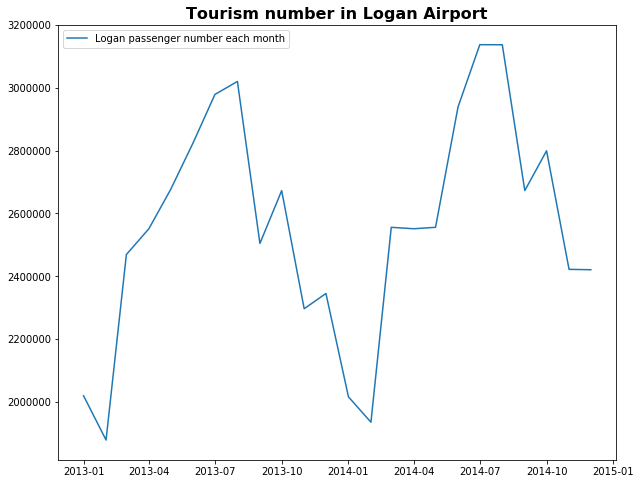

In [216]:
plt.figure(figsize=(10,8))
x=df2['Time']
y=df2['logan_passengers']

plt.plot(x,y,label="Logan passenger number each month")

plt.legend(loc="upper left")
plt.title("Tourism number in Logan Airport", fontsize=16, fontweight='bold')
plt.show()

Based on the graph above, we konw that toursim peaked at summer. The peak period(summer) almost have double times toursim than lowest period(Winter)

### <font color = 'Gray'>  Next, we will explore Labor market trend in Boston</font>

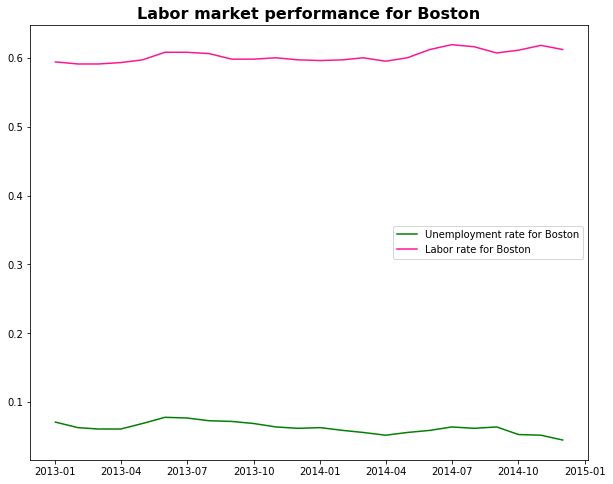

In [217]:
plt.figure(figsize=(10,8))
x=df2['Time']
z=df2['unemp_rate']
a=df2['labor_force_part_rate']

plt.plot(x,z,color = 'green', label="Unemployment rate for Boston")
plt.plot(x,a,color = 'deeppink', label="Labor rate for Boston")

plt.legend(loc="best")
plt.title("Labor market performance for Boston", fontsize=16, fontweight='bold')
plt.show()

Finding 1:
    It is clear that labor market in 2014 have lower unemployment rate

Finding 2:
    Summer labor rate higher than other period
    However, the unemployment rate in summer also higher than usual, It could because summer have more job provide.


### <font color = 'Gray'>  The heat map displayed the trend of logan passegners effect hotel occupation rate </font>


logan_passengers,1878731,1935511,2016205,2019662,2296667,2345162,2420784,2422024,2469155,2504491,...,2672640,2672685,2676291,2799342,2824862,2938917,2978718,3020074,3136875,3137087
Time,,,,,,,,,,,,,,,,,,,,,
2013-01-01,NaN,NaN,NaN,0.572,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-01,0.645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.819,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.858,NaN,NaN,NaN,NaN,NaN,NaN,NaN


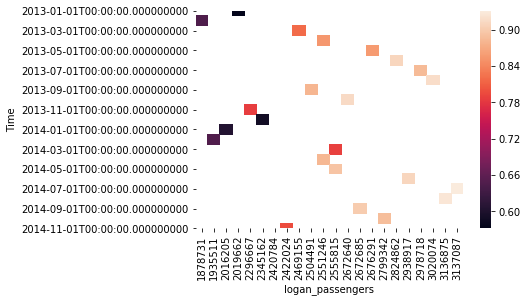

In [214]:
df3 = df2.pivot("Time","logan_passengers","hotel_occup_rate")
display(df3.head())
type(df3)
sns.heatmap(df3, annot=False)
plt.show()

Finding 1:
Hotel Occuapation rate in summer higher than other period, Winter is lowest period

Finding 2:
Passager number in logan airport have positive correlation with Hotel occupation rate

Conclusion: more passagers in logan airpot will bring more benifit for Boston, Therefore, I want to predict the number of passagers in airport to help local buiness 

# Predictive Analysis

In this part, I will using linear regression to predict the number of passangers in logan airport.

linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables)

In [278]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Take look the correlation between each indicators with passanger number in logan airport. what we found from the graph is that the airport flight has highest correlation with passanger number.

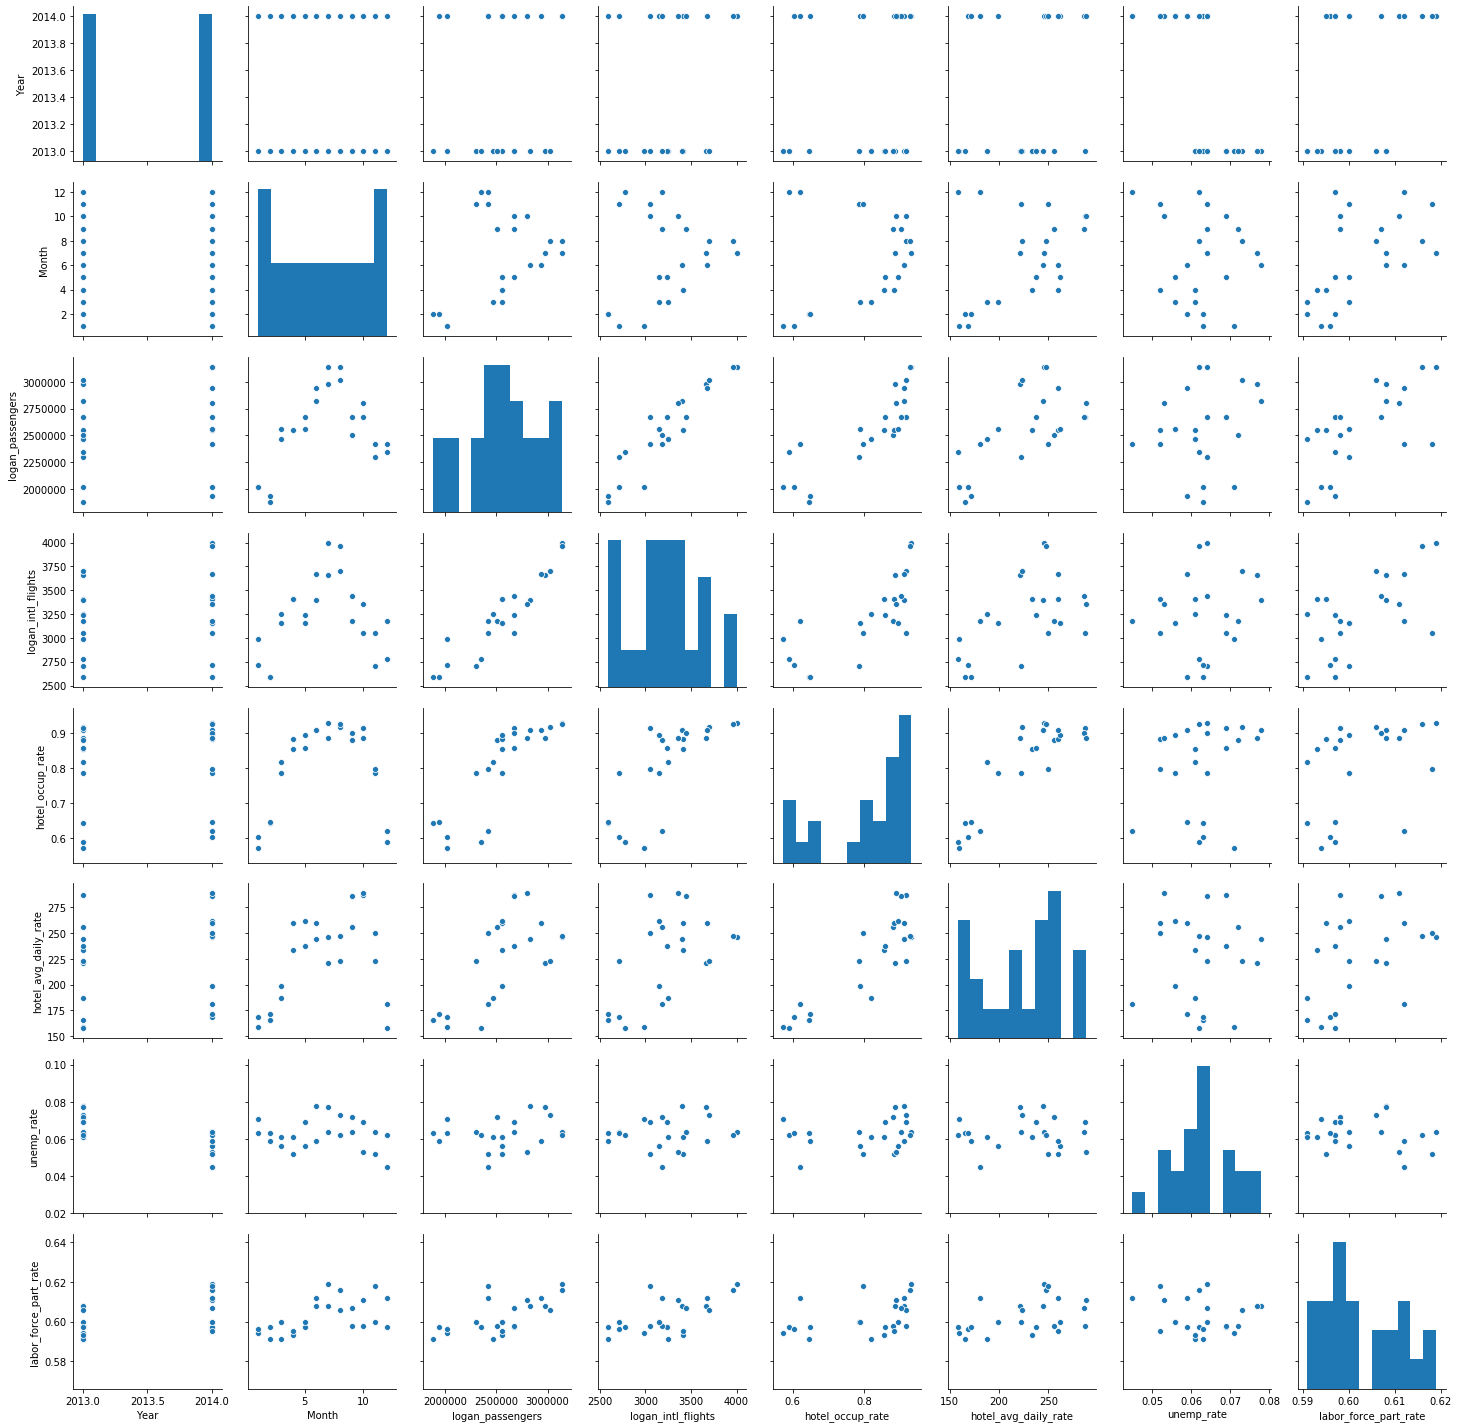

In [264]:
g
plt.show()

let's take look the detial about logan internation flights with passenger number, it's is clearly shows positive correlation

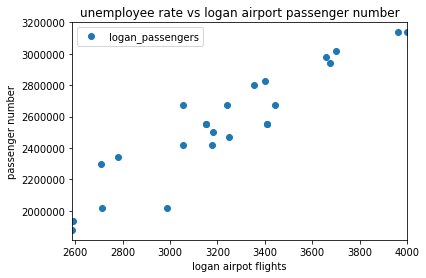

In [284]:
df2.plot(x='logan_intl_flights', y='logan_passengers', style='o')  
plt.title('unemployee rate vs logan airport passenger number')  
plt.xlabel('logan airpot flights')  
plt.ylabel('passenger number')  
plt.show()

I want to predict the Logan_passenger depending upon the Logan airport flights recorded. Therefore our attribute set will consist of the “ Logan airport flights” column which is stored in the X variable, and the label will be the “Logan_passenger” column which is stored in y variable.

In [268]:
X = df2['logan_intl_flights'].values.reshape(-1,1)
y = df2['logan_passengers'].values.reshape(-1,1)

 split 80% of the data to the training set while 20% of the data to test set using below code.

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

After splitting the data into training and testing sets, finally, train our algorithm.

In [280]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Then, start to making predict

In [272]:
y_pred = regressor.predict(X_test)

In [273]:
df4 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df4


,Actual,Predicted
0,2345162,2.116036e+06
1,2296667,2.050005e+06
2,2422024,2.368237e+06
3,2555815,2.457195e+06
4,2672685,2.724986e+06


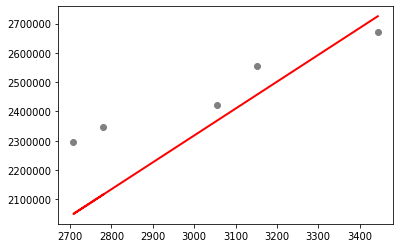

In [277]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

The predict result shows us that more flight come in, the model will more accuracy. When number flight reach around 3500, the passager number will colse with 2700000

With this, we can know when the employee rate will incrase and hotel will have higher occupation rate in the future. It can benifit to local business